# Data Science & Machine Learning 

## Internship Task

Importing the necessary libraries and packages. 

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

Importing the csv file containing the data. 

In [105]:
df = pd.read_csv("C:/Users/win/Downloads/Fraud.csv")

In [106]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Exploratory Data Analysis

In [107]:
df.shape

(6362620, 11)

In [108]:
df.info

<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [109]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking for missing value. 

In [110]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checking for null values. 

In [111]:
df.isnull().values.any()

False

In [112]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Checking for duplicate data. 

In [113]:
df.duplicated().sum()

0

Finding out the number of fraud and legitimate transactions. The column *isFraud* containing data as 0 indicates it is a legitimate transaction whereas the same column containing data as 1 is a fraud transaction. 

In [114]:
fraud = len(df[df['isFraud']==1])
legit = len(df[df['isFraud']==0])
print('farud transactions: ',fraud)
print('legit transactions: ',legit)

farud transactions:  8213
legit transactions:  6354407


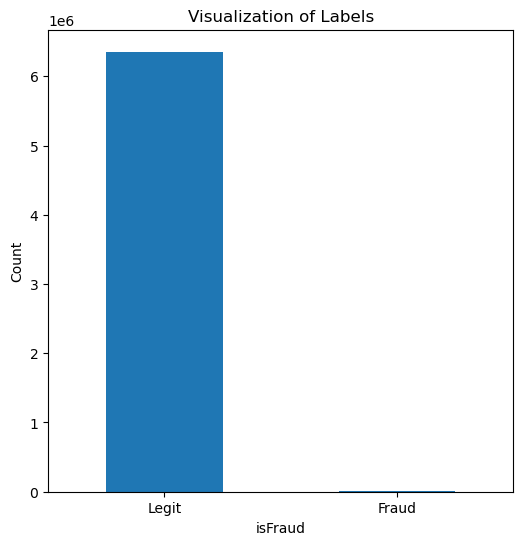

In [184]:
plt.figure(figsize=(6,6))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Displaying the rows where the *nameDest* column starts with M. As we can see, we do not have data of the destination new or old balance. 

In [116]:
rows = df[df['nameDest'].str.startswith('M')]
rows.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


Listing down the non-numeric columns of the dataset. 

In [117]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

Here I have dropped the non-numeric columns, because they do not perform any significant role in the analysis. 

I have checked if the columns contain any outliers or not. As we can see, the columns do have outliers, but we are going to keep these in the system. Outliers such as an amount of 4672401 is huge as suggests of a fraud transaction. Such values will help us in the analysis.

In [118]:
df1 = df.drop(columns=non_numeric_columns)

def find_outliers_iqr(df1):
    outliers = pd.DataFrame()
    
    for column in df1.columns:  # Fixed this line
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_in_column = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        
        if not outliers_in_column.empty:
            outliers = pd.concat([outliers, outliers_in_column])
    
    return outliers

# Find outliers in the numeric dataset
outliers = find_outliers_iqr(df1)

# Display the outliers
print("Outliers in the dataset:")
print(outliers)

Outliers in the dataset:
         step       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
6259932   604    714218.48      714218.48            0.00            0.00   
6259933   604    714218.48      714218.48            0.00       106940.83   
6259934   604    277582.53      277582.53            0.00            0.00   
6259935   604    277582.53      277582.53            0.00            0.00   
6259936   604   4672401.04     4672401.04            0.00            0.00   
...       ...          ...            ...             ...             ...   
6296014   671   3441041.46     3441041.46      3441041.46            0.00   
6351225   702   3171085.59     3171085.59      3171085.59            0.00   
6362460   730  10000000.00    17316255.05     17316255.05            0.00   
6362462   730   7316255.05    17316255.05     17316255.05            0.00   
6362584   741   5674547.89     5674547.89      5674547.89            0.00   

         newbalanceDest  isFraud  isFlaggedFraud  

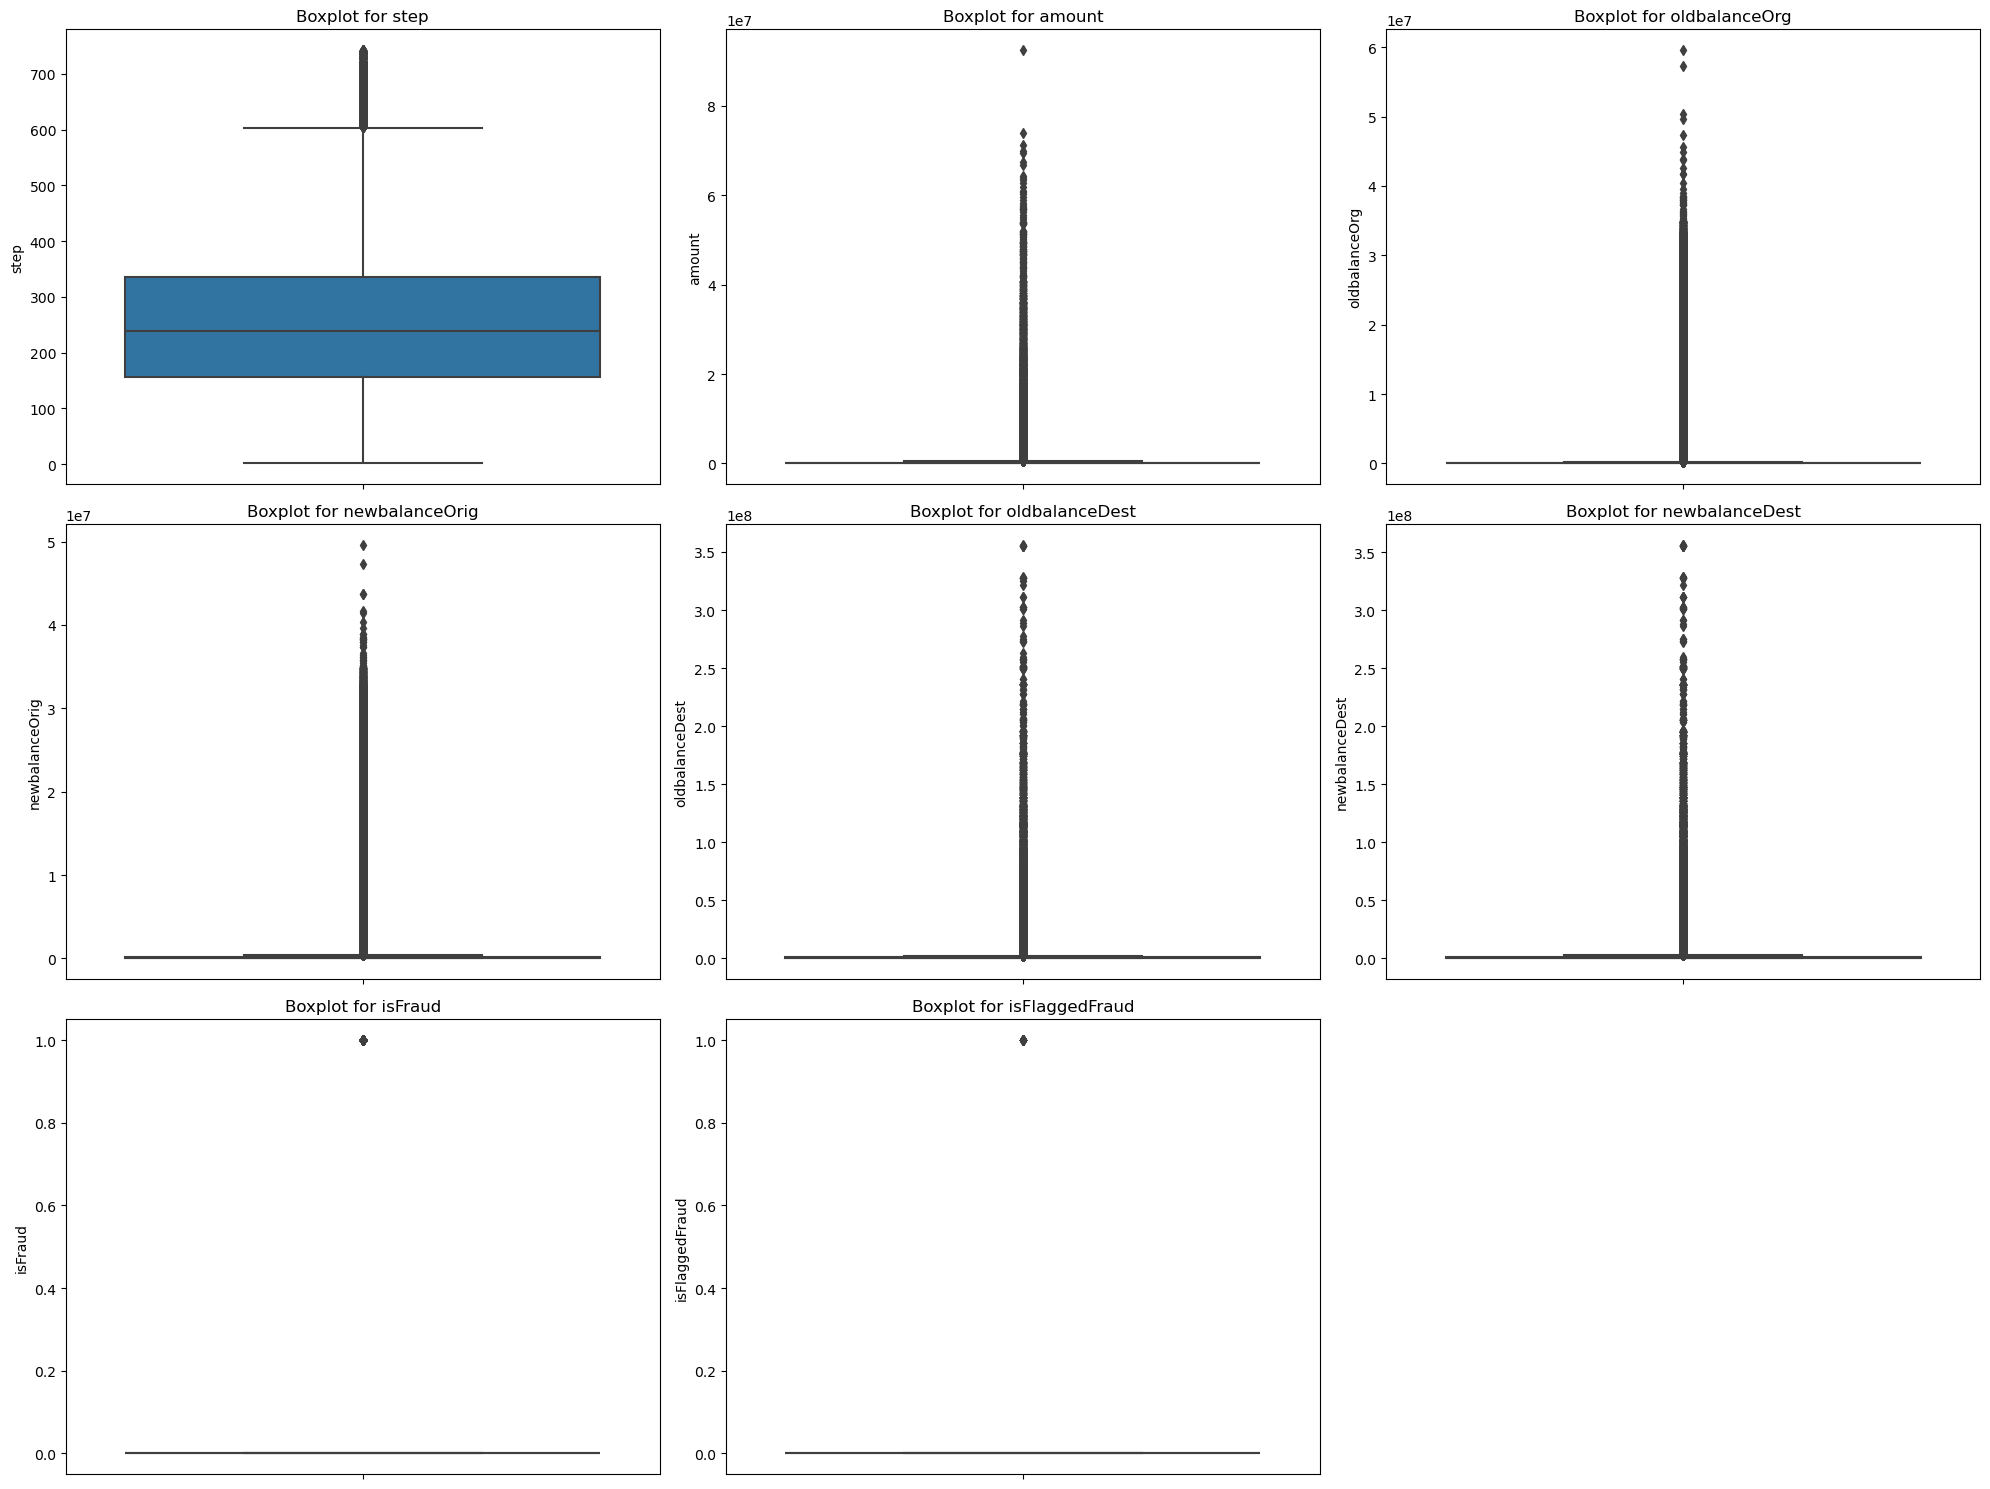

In [119]:
# Ensure column names are strings
df1.columns = df1.columns.astype(str)

# Create boxplots for each numeric column
plt.figure(figsize=(20, 15))
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(data=df1, y=column)
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


Listing down the rows that contains amount data as 0. And we can see, even when the amount of transaction was 0, still there is change in the destination old and new balances. This totally indicates a foul play in action.

In [120]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


Similary, here we can see that the column *isFlaggedFraud* having data as 1, is actually indicating of a fraud transaction. 

In [121]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


These are the rows where the value in the amount column is same as that of in the oldbalanceOrg and which was flagged as a fraud transaction. 

In [122]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


The column *type* has 5 type of transaction data stored namely cash_out, payment, cash_in, transfer, debit.

In [123]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

The plot below shows that which type of transaction has the most instances of turing out to be fraud. 

C:\Users\win\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


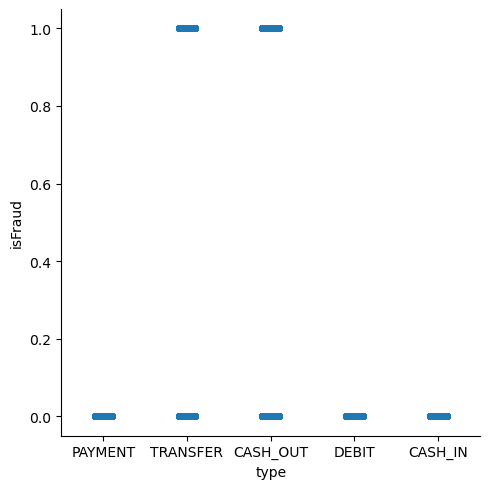

In [124]:
sns.catplot(data = df, x = 'type', y= 'isFraud')

Plotting a correlation matrix of the data.

In [125]:
corr = df.corr(numeric_only = True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


While having a look at the data in the csv file, I was skeptical that every cash_out type of transaction is fraud. So here we are checking that how many of these cases are actually true.

In [126]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In the same way checking how many transfer type of transactions are fraud. 

In [127]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


Heatmap indicating the correlation between the variables.

<Axes: >

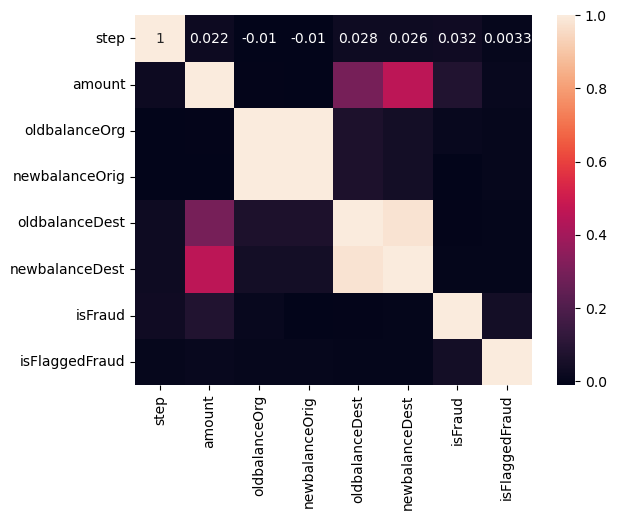

In [128]:
sns.heatmap(data = corr, annot =True)

## Feature Encoding

In [131]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [132]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,4,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,5,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,5,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,2,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,5,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,2,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Checking the unique values in the nameOrig column.


In [187]:
df['nameOrig'].value_counts()

KeyError: 'nameOrig'

Checking unique values in nameDest column. 

In [136]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

Since these columns have mostly all unique values hence they do not contribute much to the analyse and i decided to drop them. 

In [137]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [152]:
df


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9.839640e+03,170136.000,0.000000e+00,0,0
1,1,4,1.864280e+03,21249.000,0.000000e+00,0,0
2,1,2,1.810000e+02,181.000,0.000000e+00,1,0
3,1,5,1.810000e+02,181.000,2.118200e+04,1,0
4,1,4,1.166814e+04,41554.000,0.000000e+00,0,0
...,...,...,...,...,...,...,...
6362615,743,5,3.396821e+05,339682.125,0.000000e+00,1,0
6362616,743,2,6.311410e+06,6311409.500,0.000000e+00,1,0
6362617,743,5,6.311410e+06,6311409.500,6.848884e+04,1,0
6362618,743,2,8.500025e+05,850002.500,0.000000e+00,1,0


## Model Deployment

In [170]:
Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


## Decision tree

The dataset that we have is highly unbalanced as it has approximately 99% of data as legitimate and 1% as fraud data. So this makes the dataset highly unstable to undergo a train test split. To reduce the issues of in accuracy and unstability, I am using decision tree model as it is optimal when such type of data is present. 

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Fit the Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

# Predict on the test set
Y_pred_dt = dtc.predict(X_test)

# Calculate the score
dtc_score = dtc.score(X_test, Y_test) * 100
print(f"Decision Tree Classifier accuracy: {dtc_score:.2f}%")



Decision Tree Classifier accuracy: 99.93%


In [178]:
# Define the parameter distributions for hyperparameter tuning
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_dist, n_iter=50, n_jobs=-1, verbose=2, cv=None)

# Perform randomized search
random_search.fit(X_train, Y_train)

# Get the best estimator
best_dtc = random_search.best_estimator_

# Predict on the test set using the best estimator
Y_pred_best = best_dtc.predict(X_test)

# Calculate the score of the best estimator
best_dtc_score = best_dtc.score(X_test, Y_test) * 100
print(f"Best Decision Tree Classifier accuracy: {best_dtc_score:.2f}%")
print(f"Best hyperparameters: {random_search.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Decision Tree Classifier accuracy: 99.94%
Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'best'}


The model accuracy has come out to be 99.94%. This means that the model was almost accurate in predicting the whether the transaction is fraud or not. 
Such a high accuracy does give room to a thought of overfitting being present in the model training and testing. To mitigate the effect of overfitting I have used the randomsearchcv object to perform hyperparameter tuning on the model. This practice will make sure that the result is precise. 

In [183]:
from sklearn.metrics import confusion_matrix, f1_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_best)
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")



# Calculate the F1 score
f1 = f1_score(Y_test, Y_pred_best, average='weighted')
print(f"F1 Score: {f1:.2f}")

True Negatives: 1905957
False Positives: 394
False Negatives: 677
True Positives: 1758
F1 Score: 1.00


These are the performance paramters that determine the performance of the decision tree models. 1905957 times the model correctly identified a legitimate transaction, which is true as majority of the data contains legitimate transactions. Similarly, it shows the true positives, false positives and false negative values. 

I have checked if the dataset had any missing values or not, also plotted a boxplot to determine the presence of outliers. I am keeping the outliers in the data as they might show the posibility of a fraud transaction. I checked for multicollinearity. The columns such as the nameOrig, nameDest had non-numeric data and had many unique values which did not contribute enough to the analysis, so i dropped those columns. 

As a result of the analysis, it came to my attention that the CASH_OUT and TRANSFER type of transactions were fraud. Also the transactions that had amount as 0 were also fraud. The transactions with the amount and oldbalanceOrig having same values and which were announced fraud were actually fraud. Apart from that, transactions with the data in isFlaggedFraud column as 1 were fraud. 

These factors make sense to me as the rows that had type as cash_out had either the oldbalanceOrg missing or the newbalanceDest missing. If the cash was being taken out it should have been debited in the destination account and should have been reflected in the balance. 
Also most of the transactions with type 'transfer' had the nameDest starting with 'M' and all such rows where nameDest started with 'M' had the oldbalanceDest and newbalanceDest data missing. 
These reasons show that the factors were correct. 

To prevent such type of fraud transactions from taking place, the financial company can establish a digital infrastructure where a unique ID of numbers and literals gets generated everytime a user want to make a transaction. This unique ID will also be generated at the receiver's end, and they both have to compare it in order to make a successful legitimate transaction.

This proposal is at its conception stage. With the help of industry professionals and experts, and after a robust coginition on the nitty-grittes of the problem and the proposed solution, it will be helpful to the real world.